In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
print(data)

[ 5.99342831  4.7234714   6.29537708  8.04605971  4.53169325  4.53172609
  8.15842563  6.53486946  4.06105123  6.08512009  4.07316461  4.06854049
  5.48392454  1.17343951  1.55016433  3.87542494  2.97433776  5.62849467
  3.18395185  2.1753926   7.93129754  4.5484474   5.13505641  2.15050363
  3.91123455  5.22184518  2.69801285  5.75139604  3.79872262  4.4166125
  3.79658678  8.70455637  4.97300555  2.88457814  6.64508982  2.5583127
  5.41772719  1.08065975  2.3436279   5.39372247  6.47693316  5.34273656
  4.76870344  4.39779261  2.04295602  3.56031158  4.07872246  7.11424445
  5.68723658  1.47391969  5.64816794  4.22983544  3.646156    6.22335258
  7.06199904  6.86256024  3.32156495  4.38157525  5.66252686  6.95109025
  4.04165152  4.62868205  2.78733005  2.60758675  6.62505164  7.71248006
  4.85597976  7.0070658   5.72327205  3.70976049  5.72279121  8.07607313
  4.92834792  8.12928731 -0.23949021  6.64380501  5.17409414  4.4019853
  5.18352155  1.02486217  4.56065622  5.71422514  7.95

In [2]:
np.random.seed(42)
true_mean = 5
true_std = 2
data = np.random.normal(loc=true_mean, scale=true_std, size=100)

In [3]:
def log_likelihood(params, data):
    mean, std = params
    if std <= 0:
        return np.inf
    return -np.sum(norm.logpdf(data, loc=mean, scale=std))

In [4]:
initial_params = [np.mean(data), np.std(data)]

In [5]:
result = minimize(log_likelihood, initial_params, args=(data,), method='L-BFGS-B', 
                  bounds=[(None, None), (1e-5, None)])

In [6]:
mle_mean, mle_std = result.x

In [7]:
print("True Parameters:")
print(f"Mean: {true_mean}, Std: {true_std}")
print("\nEstimated Parameters (MLE):")
print(f"Mean: {mle_mean:.4f}, Std: {mle_std:.4f}")

True Parameters:
Mean: 5, Std: 2

Estimated Parameters (MLE):
Mean: 4.7923, Std: 1.8072


In [8]:
x = np.linspace(min(data), max(data), 1000)
true_pdf = norm.pdf(x, loc=true_mean, scale=true_std)
mle_pdf = norm.pdf(x, loc=mle_mean, scale=mle_std)

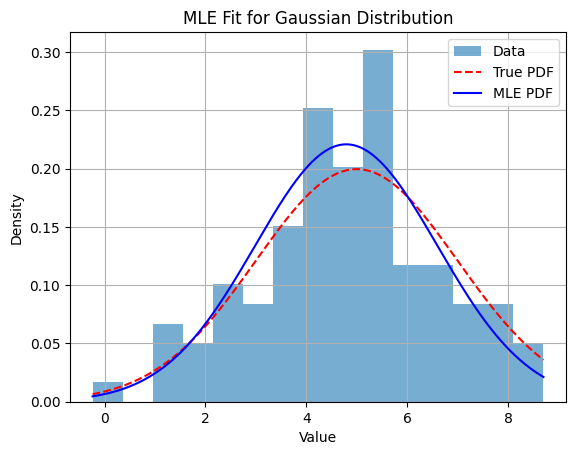

In [9]:
plt.hist(data, bins=15, density=True, alpha=0.6, label='Data')
plt.plot(x, true_pdf, label='True PDF', color='red', linestyle='--')
plt.plot(x, mle_pdf, label='MLE PDF', color='blue')
plt.title('MLE Fit for Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()